Task 1) <br>
The sensor is overall not very reliable. However, it is more accurate at detecting a closed door correctley (80%) than an open door (60%).

p(x|u,xt-1): <br>
p(0|0,0) = 1.0 <br>
p(1|0,0) = 0.0 <br>
p(0|0,1) = 0.0 <br>
p(1|0,1) = 1.0 <br>
p(0|1,0) = 0.2 <br>
p(1|1,0) = 0.8 <br>
p(0|1,1) = 0.0 <br>
p(1|1,1) = 1.0 <br>

We have here a deterministic model for all state action pairs except for when we try and open a closed door (u = 1, xt-1 = 0). At which point we will successfuly open the door 80% of the time.

Task 2)

First, import numpy and matplotlib.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Define function p_measure(z,x) that returns the probability p(z|x).

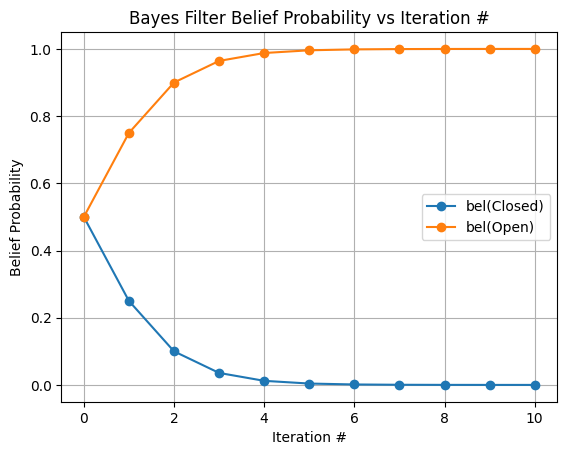

Q1) The robot will be 99.99% certain that the door is open after iteration 9


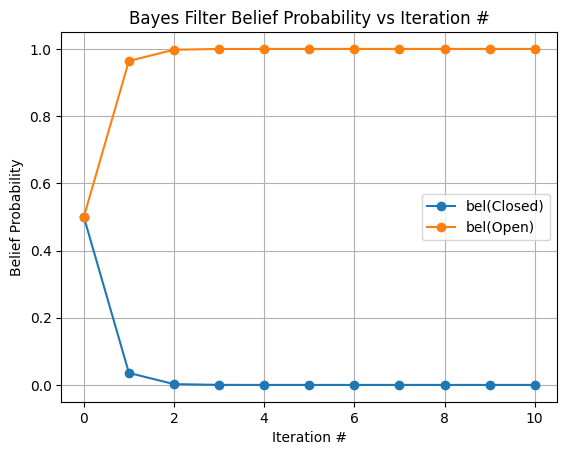

Q2) The robot will be 99.99% certain that the door is open after iteration 4


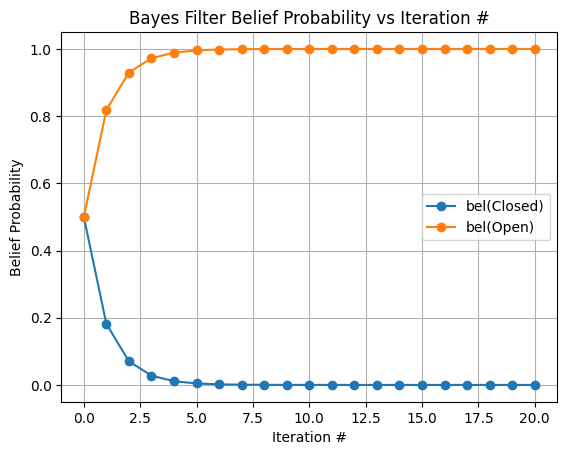

Q3) The steady state belief is Open with a certainty of 100.0%


In [2]:
# %% [markdown]
# Task 1) <br>
# The sensor is overall not very reliable. However, it is more accurate at detecting a closed door correctley (80%) than an open door (60%).
# 
# p(x|u,xt-1): <br>
# p(0|0,0) = 1.0 <br>
# p(1|0,0) = 0.0 <br>
# p(0|0,1) = 0.0 <br>
# p(1|0,1) = 1.0 <br>
# p(0|1,0) = 0.2 <br>
# p(1|1,0) = 0.8 <br>
# p(0|1,1) = 0.0 <br>
# p(1|1,1) = 1.0 <br>
# 
# We have here a deterministic model for all state action pairs except for when we try and open a closed door (u = 1, xt-1 = 0). At which point we will successfuly open the door 80% of the time.

# %% [markdown]
# Task 2)
# 
# First, import numpy and matplotlib.

# %%
import numpy as np
from matplotlib import pyplot as plt

# %% [markdown]
# Define function p_measure(z,x) that returns the probability p(z|x).

# %%
def p_measure(z, x):
    """Looks up measurement probability.
    returns p(z|x)
    Args:
        z: measurement 0 = closed, 1 = open. int
        x: initial state, 0 = closed, 1 = open. int
    Returns:
        p: probability of z given x. float
    """

    if [z, x] == [1, 1]:
        p = 0.6
    elif [z, x] == [0, 1]:
        p = 0.4
    elif [z, x] == [1, 0]:
        p = 0.2
    elif [z, x] == [0, 0]:
        p = 0.8
    return p

# %% [markdown]
# Define function p_transition(X,u,x) that returns the p(xt | ut, xt-1).

# %%
def p_transition(X, u, x):
    """Looks up state transition probability.
    returns p(X|u,x)
    Args:
        X: state we want belief from, 0 = closed, 1 = open. int
        u: robot action for current step, 0 = do nothing, 1 = push. int
        x: initial state, 0 = closed, 1 = open. int
    Returns:
        po: probability door is closed. flaot
        p1: probability door is open. flaot
    """

    if [x, u] == [0, 0]: # closed, do nothing
        p0 = 1.0
    elif [x, u] == [1, 0]:  # open, do nothing
        p0 = 0.0
    elif [x, u] == [1, 1]:  # open, push
        p0 = 0.0
    elif [x, u] == [0, 1]:  # closed, push
        p0 = 0.2

    p1 = 1.0 - p0

    if X:
        return p1
    else:
        return p0

# %% [markdown]
# Defines function predict(bel, u, debug) that implements the predict step of the Bayes filter. This step computes and returns the posterior belief given the previous belief and action u.

# %%
def predict(bel, u, debug):
    """Implements predict step for Bayes Filter algotithm.
    Args:
        bel: prior belief. [float, float]
        u: robot action for current step. int
        debug: print out debug statements if true. boolean
    Returns:
        bel: Posterior belief. [float, float]
    """

    bel2  = [0, 0]
    bel2[0] = p_transition(0, u, 1) * bel[1] + p_transition(0, u, 0) * bel[0]
    bel2[1] = p_transition(1, u, 1) * bel[1] + p_transition(1, u, 0) * bel[0]
    bel = bel2

    if debug:
        print('Posterior belief: ' + str(np.round(bel, 4)))

    return bel

# %% [markdown]
# Defines funciton update(bel, z, debug) that implements the update portion of the Bayes filter. This function retuns the updated belief given the posterior belief and a measurement z.

# %%
def update(bel, z, debug):
    """Implements update step for Bayes Filter algotithm.
    Args:
        bel: posterior belief. [float, float]
        z: measurement for current step, 0 = closed, 1 = open. int
        debug: print out debug statements if true. boolean
    Returns:
        bel: Updated belief. [float, float]
    """
    
    bel[0] = p_measure(z, 0) * bel[0]
    bel[1] = p_measure(z, 1) * bel[1]
    if debug:
        print('+ Measurement belief: ' + str(np.round(bel, 4)))

    # normalize bel so sum(bel) = 1.0
    bel /= np.sum(bel)

    # if debug:
    #     print('+ normalization belief: ' + str(np.round(bel, 4)) + ' n = ' + str(round(n, 4)))
    if debug:
        print('Updated belief: ' + str(np.round(bel, 4)))

    return bel

# %% [markdown]
# Defines the function Bayes(u, z, bel, debug, plot)that takes in an array of inputs u and array of meassurements z, as well as an optional initial belief (default to [0.5, 0.5]). This function returns an array of the updated beliefs at each step.

# %%
def Bayes(u, z, bel = [0.5, 0.5], debug = False, plot = False):
    """Performs Bayes filtering
    Args:
        bel: Initial beliefs, default to [0.5, 0.5]. [float, float]
        u: robot actions, 0 = do nothing, 1 = push. nx1 int array
        z: measurements, 0 = closed, 1 = open. nx1 int array
        debug: print out debug statements if true, default off. boolean
        plot: option to plot bel at each iteration, default off. boolean
    Returns:
        bels: history of beliefs. nx2 float array
    """

    # Ensures u and z are of same length
    if len(u) != len(z):
        raise Exception("u and z must be same length")

    # init bels
    bels = np.zeros([len(u)+1, 2])
    bels[0,:] = bel

    for k in range(len(u)): # iterate through steps and predict/update bel
        if debug:
            print('***** Iteration '+ str(k) +' *****')
        bel = predict(bel, u[k], debug)
        bel = update(bel, z[k], debug)
        bels[k+1,:] = bel
    
    if plot:    # Make bel vs iteration plot
        plt.plot(np.arange(len(u)+1), bels[:,0], marker='o', label='bel(Closed)')
        plt.plot(np.arange(len(u)+1), bels[:,1], marker='o', label='bel(Open)')
        plt.grid(True)
        plt.xlabel('Iteration #')
        plt.ylabel('Belief Probability')
        plt.title('Bayes Filter Belief Probability vs Iteration #')
        plt.legend()
        plt.show()

    return bels

# %% [markdown]
# 1) If the robot always takes the action “do nothing” and always receives the measurement “door open” how many iterations will it take before the robot is at least 99.99% certain the door is open?

# %%
## Question 1 - action = do nothing, measurement = door open
u =  np.zeros([10,1]) # define actions 
z = np.ones([10,1]) # define measurements
bels = Bayes(u, z, debug = False, plot = True) # run Bayes filter
print('Q1) The robot will be 99.99% certain that the door is open after iteration ' + str(np.argmax(bels[:,1] > 0.9999)))

# %% [markdown]
# 2) If the robot always takes the action “push” and always receives the measurement “door open” how many iterations will it take before the robot is at least 99.99% certain the door is open?

# %%
## Question 2 - action = do nothing, measurement = door closed
u =  np.ones([10,1]) # define actions
z = np.ones([10,1]) # define measurements
bels = Bayes(u, z, debug = False, plot = True) # run Bayes filter
print('Q2) The robot will be 99.99% certain that the door is open after iteration ' + str(np.argmax(bels[:,1] > 0.9999)))

# %% [markdown]
# 3) If the robot always takes the action “push” and always receives the measurement “door closed” what is the steady state belief about the door? Include both the state and the certainty.

# %%
## Question 3 - action = push, measurement = door closed
u =  np.ones([20,1]) # define actions
z = np.zeros([20,1]) # define measurements
bels = Bayes(u, z, debug = False, plot = True) # run Bayes filter

# Current estimate is highest prop belief
if bels[-1,1] > 0.5:
    ssbelief = 'Open'
    certainty = 100 * bels[-1,1]
else:
    ssbelief = 'Closed'
    certainty = 100 * bels[-1,0]

print('Q3) The steady state belief is ' + ssbelief + ' with a certainty of ' + str(round(certainty, 5)) + '%')


# %%





Define function p_transition(X,u,x) that returns the p(xt | ut, xt-1).

In [3]:
def p_transition(X, u, x):
    """Looks up state transition probability.
    returns p(X|u,x)
    Args:
        X: state we want belief from, 0 = closed, 1 = open. int
        u: robot action for current step, 0 = do nothing, 1 = push. int
        x: initial state, 0 = closed, 1 = open. int
    Returns:
        po: probability door is closed. flaot
        p1: probability door is open. flaot
    """

    if [x, u] == [0, 0]: # closed, do nothing
        p0 = 1.0
    elif [x, u] == [1, 0]:  # open, do nothing
        p0 = 0.0
    elif [x, u] == [1, 1]:  # open, push
        p0 = 0.0
    elif [x, u] == [0, 1]:  # closed, push
        p0 = 0.2

    p1 = 1.0 - p0

    if X:
        return p1
    else:
        return p0

Defines function predict(bel, u, debug) that implements the predict step of the Bayes filter. This step computes and returns the posterior belief given the previous belief and action u.

In [4]:
def predict(bel, u, debug):
    """Implements predict step for Bayes Filter algotithm.
    Args:
        bel: prior belief. [float, float]
        u: robot action for current step. int
        debug: print out debug statements if true. boolean
    Returns:
        bel: Posterior belief. [float, float]
    """

    bel2  = [0, 0]
    bel2[0] = p_transition(0, u, 1) * bel[1] + p_transition(0, u, 0) * bel[0]
    bel2[1] = p_transition(1, u, 1) * bel[1] + p_transition(1, u, 0) * bel[0]
    bel = bel2

    if debug:
        print('Posterior belief: ' + str(np.round(bel, 4)))

    return bel

Defines funciton update(bel, z, debug) that implements the update portion of the Bayes filter. This function retuns the updated belief given the posterior belief and a measurement z.

In [5]:
def update(bel, z, debug):
    """Implements update step for Bayes Filter algotithm.
    Args:
        bel: posterior belief. [float, float]
        z: measurement for current step, 0 = closed, 1 = open. int
        debug: print out debug statements if true. boolean
    Returns:
        bel: Updated belief. [float, float]
    """
    
    bel[0] = p_measure(z, 0) * bel[0]
    bel[1] = p_measure(z, 1) * bel[1]
    if debug:
        print('+ Measurement belief: ' + str(np.round(bel, 4)))

    # normalize bel so sum(bel) = 1.0
    bel /= np.sum(bel)

    # if debug:
    #     print('+ normalization belief: ' + str(np.round(bel, 4)) + ' n = ' + str(round(n, 4)))
    if debug:
        print('Updated belief: ' + str(np.round(bel, 4)))

    return bel

Defines the function Bayes(u, z, bel, debug, plot)that takes in an array of inputs u and array of meassurements z, as well as an optional initial belief (default to [0.5, 0.5]). This function returns an array of the updated beliefs at each step.

In [6]:
def Bayes(u, z, bel = [0.5, 0.5], debug = False, plot = False):
    """Performs Bayes filtering
    Args:
        bel: Initial beliefs, default to [0.5, 0.5]. [float, float]
        u: robot actions, 0 = do nothing, 1 = push. nx1 int array
        z: measurements, 0 = closed, 1 = open. nx1 int array
        debug: print out debug statements if true, default off. boolean
        plot: option to plot bel at each iteration, default off. boolean
    Returns:
        bels: history of beliefs. nx2 float array
    """

    # Ensures u and z are of same length
    if len(u) != len(z):
        raise Exception("u and z must be same length")

    # init bels
    bels = np.zeros([len(u)+1, 2])
    bels[0,:] = bel

    for k in range(len(u)): # iterate through steps and predict/update bel
        if debug:
            print('***** Iteration '+ str(k) +' *****')
        bel = predict(bel, u[k], debug)
        bel = update(bel, z[k], debug)
        bels[k+1,:] = bel
    
    if plot:    # Make bel vs iteration plot
        plt.plot(np.arange(len(u)+1), bels[:,0], marker='o', label='bel(Closed)')
        plt.plot(np.arange(len(u)+1), bels[:,1], marker='o', label='bel(Open)')
        plt.grid(True)
        plt.xlabel('Iteration #')
        plt.ylabel('Belief Probability')
        plt.title('Bayes Filter Belief Probability vs Iteration #')
        plt.legend()
        plt.show()

    return bels

1) If the robot always takes the action “do nothing” and always receives the measurement “door open” how many iterations will it take before the robot is at least 99.99% certain the door is open?

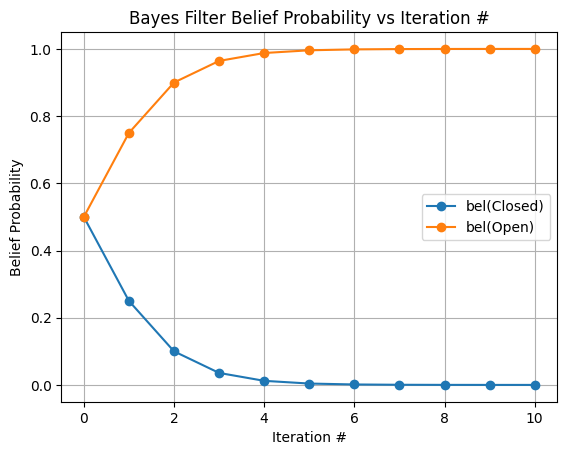

Q1) The robot will be 99.99% certain that the door is open after iteration 9


In [7]:
## Question 1 - action = do nothing, measurement = door open
u =  np.zeros([10,1]) # define actions 
z = np.ones([10,1]) # define measurements
bels = Bayes(u, z, debug = False, plot = True) # run Bayes filter
print('Q1) The robot will be 99.99% certain that the door is open after iteration ' + str(np.argmax(bels[:,1] > 0.9999)))

This outcome makes sense, as if the door is always measured as open with no action to change this outcome, then its obvious to assume an open door.

2) If the robot always takes the action “push” and always receives the measurement “door open” how many iterations will it take before the robot is at least 99.99% certain the door is open?

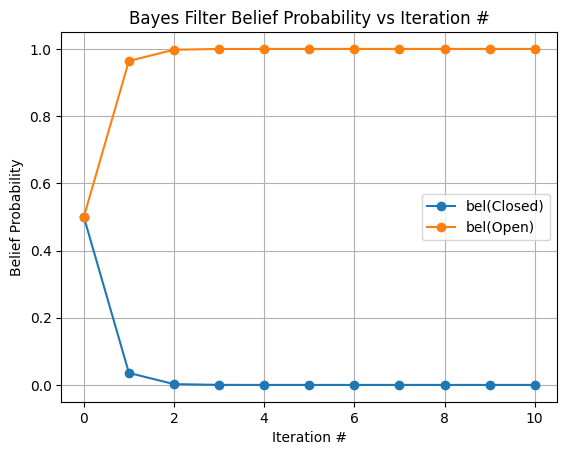

Q2) The robot will be 99.99% certain that the door is open after iteration 4


In [8]:
## Question 2 - action = do nothing, measurement = door closed
u =  np.ones([10,1]) # define actions
z = np.ones([10,1]) # define measurements
bels = Bayes(u, z, debug = False, plot = True) # run Bayes filter
print('Q2) The robot will be 99.99% certain that the door is open after iteration ' + str(np.argmax(bels[:,1] > 0.9999)))

This answer also make sense. It is expected to converge on 100% open faster than step 1 because even if our open measurements are incorrect (by chance), the action of opening the door will likley result in an open door.

3) If the robot always takes the action “push” and always receives the measurement “door closed” what is the steady state belief about the door? Include both the state and the certainty.

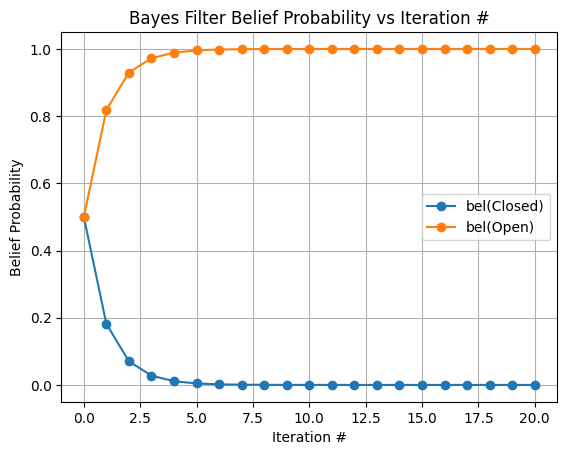

Q3) The steady state belief is Open with a certainty of 100.0%


In [9]:
## Question 3 - action = push, measurement = door closed
u =  np.ones([20,1]) # define actions
z = np.zeros([20,1]) # define measurements
bels = Bayes(u, z, debug = False, plot = True) # run Bayes filter

# Current estimate is highest prop belief
if bels[-1,1] > 0.5:
    ssbelief = 'Open'
    certainty = 100 * bels[-1,1]
else:
    ssbelief = 'Closed'
    certainty = 100 * bels[-1,0]

print('Q3) The steady state belief is ' + ssbelief + ' with a certainty of ' + str(round(certainty, 5)) + '%')


This answer makes sense because with the repeated action of opening the door, only one attempt has to be successful for the state to be open. Also, the odds of opening a closed door (80%) is greater than the odds of correctley measuing an open door (60%).